In [22]:
import numpy as np
import pandas as pd 
import seaborn as sns
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [23]:
df=pd.read_csv('ElectionData.csv')

In [24]:
df.head(2)

TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   
1            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66   
1                   2.5       8874  ...                 52.66   

   pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                813743           428546       PS         0       38.29   
1                813743           428546  PPD/PSD         0       33.28   

   validVotesPercentage   Votes  Hondt  FinalMandates  
0                 40.22  147993     94            106  
1                 34.95  128624     81             77  

[2 rows x 28 columns]

In [25]:
df.describe()

TimeElapsed  totalMandates  availableMandates   numParishes  \
count  21643.000000   21643.000000       21643.000000  21643.000000   
mean     133.146052      11.544795          11.499284    309.956013   
std       77.651193      31.314567          31.738783    659.055911   
min        0.000000       0.000000           0.000000     54.000000   
25%       65.000000       1.000000           0.000000     75.000000   
50%      135.000000       4.000000           3.000000    147.000000   
75%      200.000000       9.000000           9.000000    242.000000   
max      265.000000     226.000000         226.000000   3092.000000   

       numParishesApproved     blankVotes  blankVotesPercentage     nullVotes  \
count         21643.000000   21643.000000          21643.000000  21643.000000   
mean            261.090237    8875.066673              2.621629   6148.068752   
std             583.377428   21484.874088              0.795289  14735.469269   
min               3.000000      19.000000              0.530000     39.000000   
25%              67.000000    1188.000000              2.230000   1094.000000   
50%             120.000000    2998.000000              2.640000   2232.000000   
75%             208.000000    6889.000000              2.980000   4121.000000   
max            3092.000000  129599.000000              5.460000  88539.000000   

       nullVotesPercentage  votersPercentage  ...  pre.nullVotesPercentage  \
count         21643.000000      21643.000000  ...             21643.000000   
mean              1.961471         51.983722  ...                 1.777442   
std               0.375250          4.854380  ...                 0.388798   
min               1.340000         35.980000  ...                 1.140000   
25%               1.720000         50.290000  ...                 1.520000   
50%               1.870000         53.130000  ...                 1.690000   
75%               2.230000         54.550000  ...                 1.970000   
max               3.350000         59.870000  ...                 3.120000   

       pre.votersPercentage  pre.subscribedVoters  pre.totalVoters  \
count          21643.000000          2.164300e+04     2.164300e+04   
mean              54.549372          6.378503e+05     3.594932e+05   
std                4.964948          1.544418e+06     8.763729e+05   
min               40.870000          6.383000e+03     3.215000e+03   
25%               51.210000          1.289260e+05     6.964400e+04   
50%               56.260000          2.284970e+05     1.102730e+05   
75%               58.220000          3.933140e+05     2.276200e+05   
max               62.580000          9.439701e+06     5.380451e+06   

           Mandates    Percentage  validVotesPercentage         Votes  \
count  21643.000000  21643.000000          21643.000000  2.164300e+04   
mean       0.565495      4.968484              5.207232  1.585209e+04   
std        4.421804     10.379967             10.881108  9.310605e+04   
min        0.000000      0.020000              0.020000  1.000000e+00   
25%        0.000000      0.220000              0.230000  2.360000e+02   
50%        0.000000      0.620000              0.650000  7.900000e+02   
75%        0.000000      3.010000              3.160000  4.510000e+03   
max      106.000000     49.110000             51.420000  1.866407e+06   

              Hondt  FinalMandates  
count  21643.000000   21643.000000  
mean       1.126138       1.126138  
std        6.293552       6.872644  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max       94.000000     106.000000  

[8 rows x 25 columns]

In [26]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



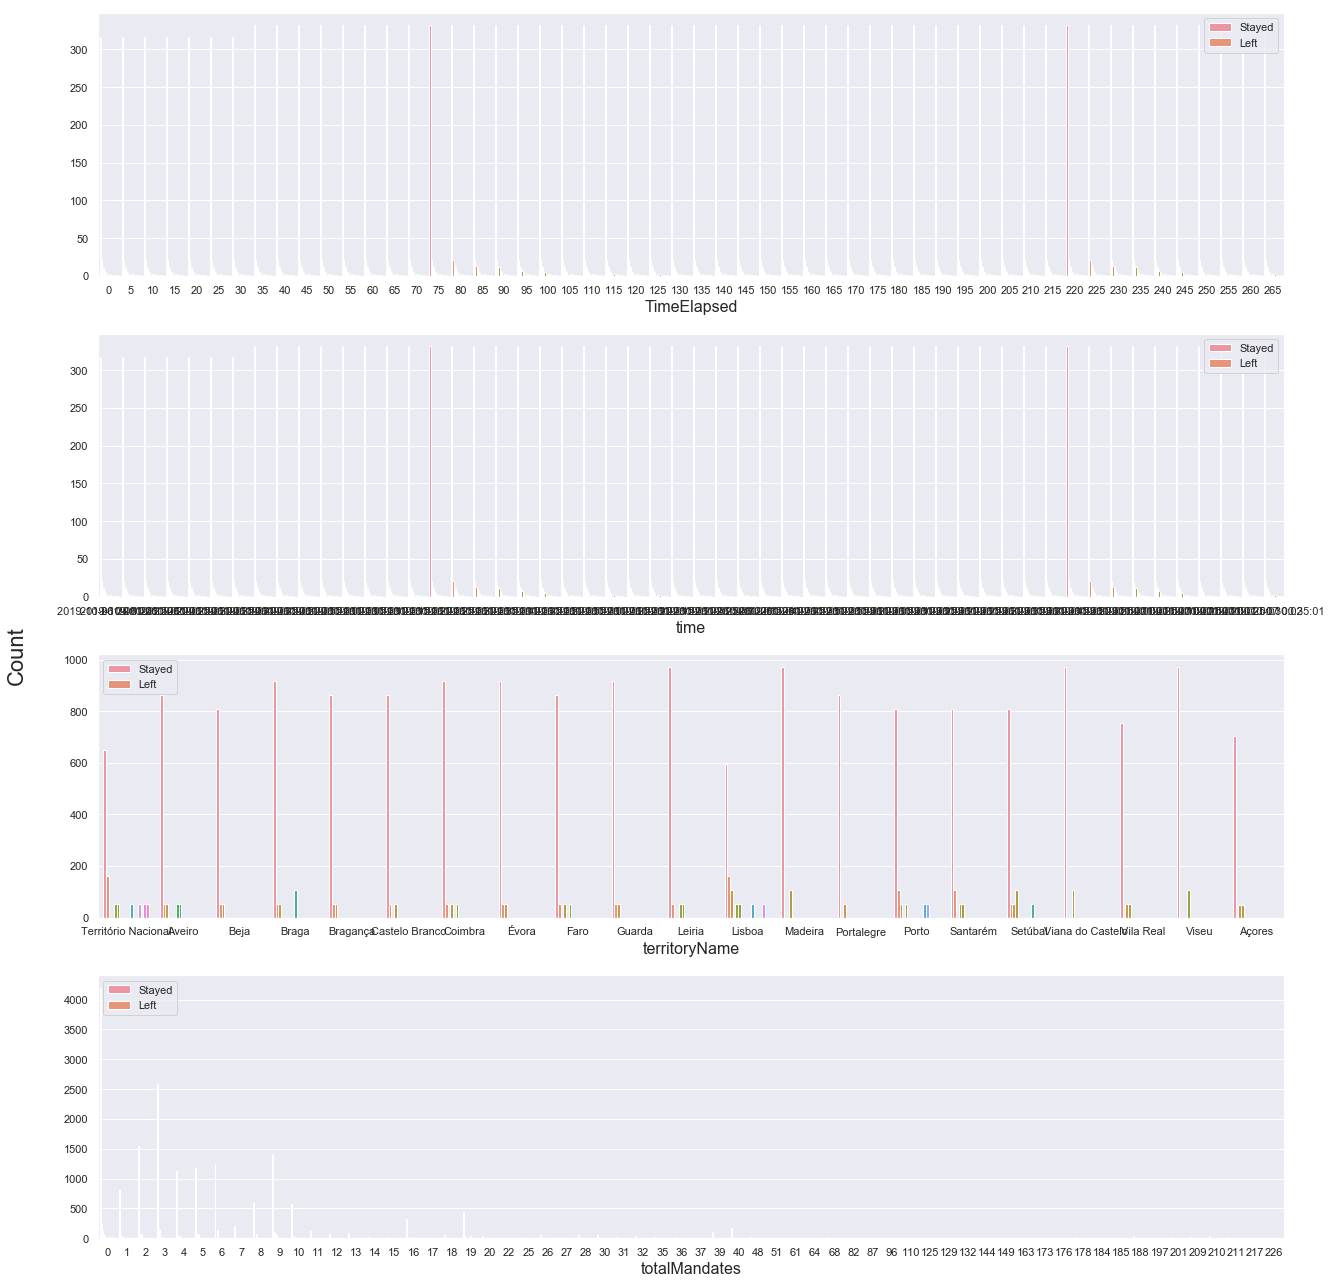

In [27]:
f, axes = plt.subplots(4, 1, figsize=(18,18), tight_layout=True)
x_vars = ['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='FinalMandates', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

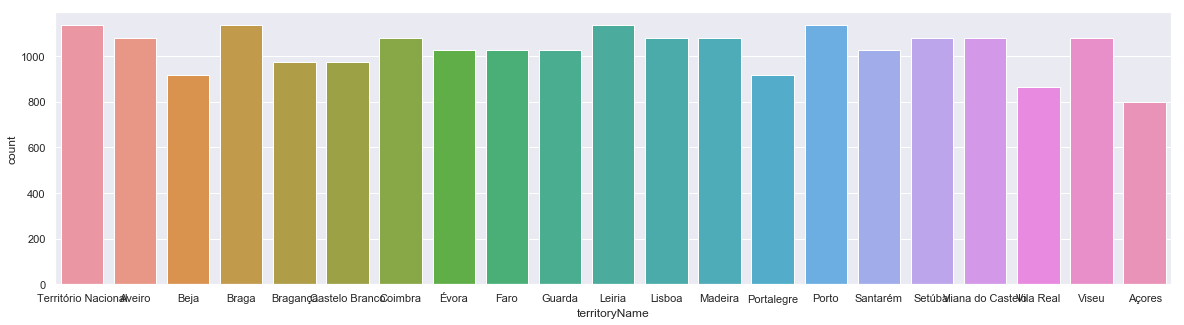

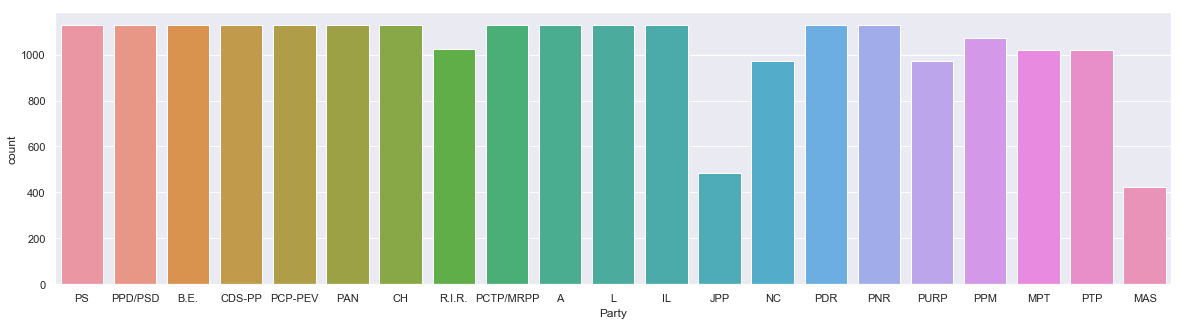

In [28]:
plt.figure(figsize=(20, 5))
#sns.countplot(x='Hours', hue='Income', data=df)
sns.countplot(df.territoryName)

plt.figure(figsize=(20, 5))
sns.countplot(df.Party)

# category data analysis on the basiss of TERITORY

Text(0, 0.5, 'totalVoters')

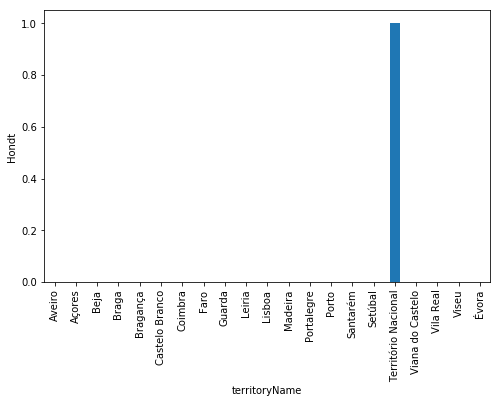

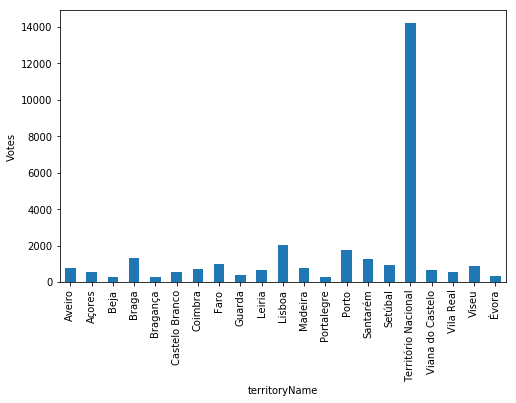

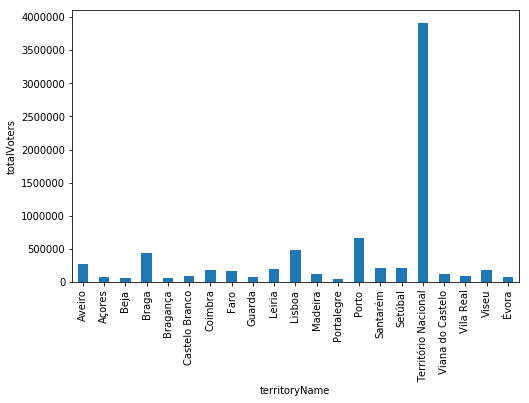

In [8]:

plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['Hondt'].median())

mpg.plot(kind='bar')
plt.ylabel('Hondt')
plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['Votes'].median())

mpg.plot(kind='bar')
plt.ylabel('Votes')
plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['totalVoters'].median())

mpg.plot(kind='bar')
plt.ylabel('totalVoters')



<Figure size 576x360 with 0 Axes>

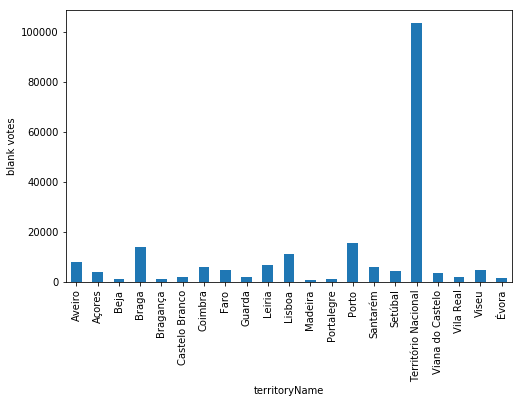

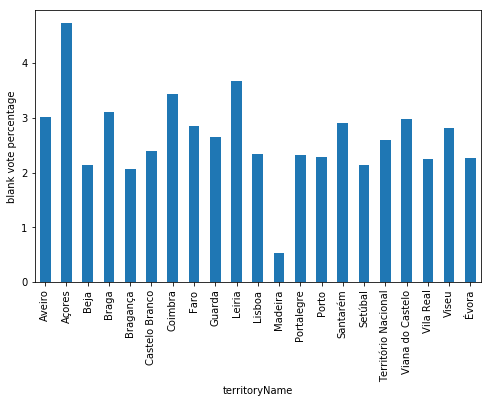

<Figure size 576x360 with 0 Axes>

In [9]:
plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['totalMandates'].median())
plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['blankVotes'].median())

mpg.plot(kind='bar')
plt.ylabel('blank votes')
plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['blankVotesPercentage'].median())

mpg.plot(kind='bar')
plt.ylabel('blank vote percentage')
plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['nullVotes'].median())





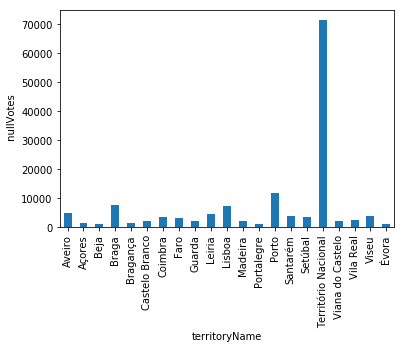

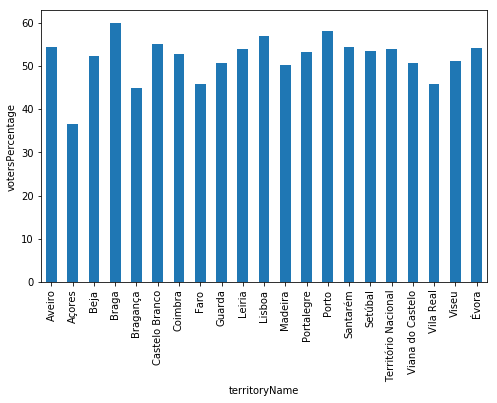

<Figure size 576x360 with 0 Axes>

In [10]:
mpg.plot(kind='bar')
plt.ylabel(' nullVotes')
plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['votersPercentage'].median())

mpg.plot(kind='bar')
plt.ylabel('votersPercentage')

plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['totalMandates'].median())

Text(0, 0.5, 'Number of parishes approved in this location')

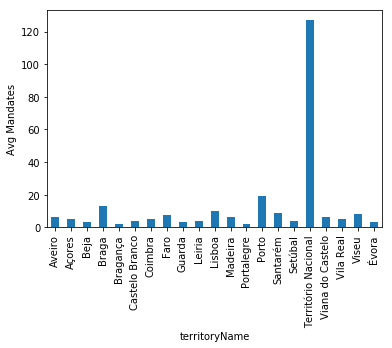

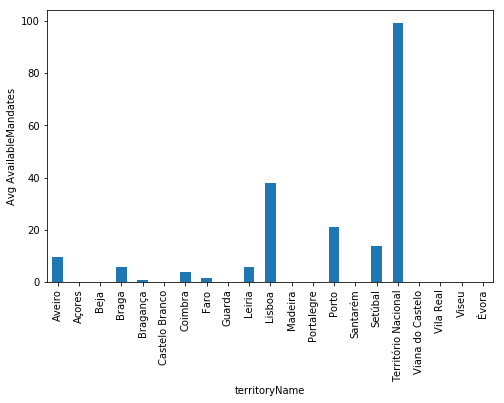

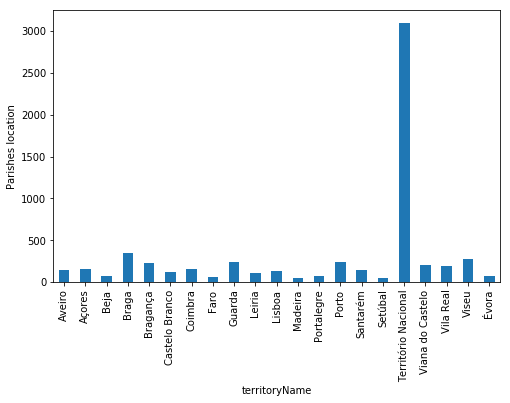

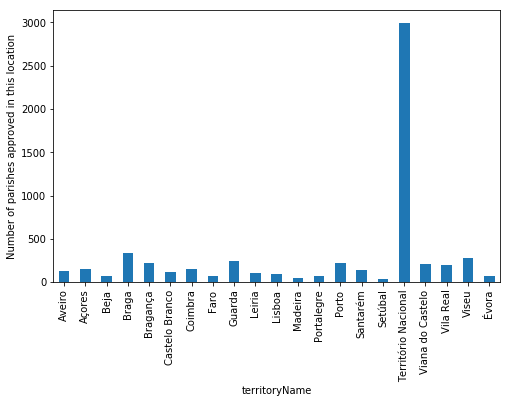

In [11]:
mpg.plot(kind='bar')
plt.ylabel('Avg Mandates')
plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['availableMandates'].median())

mpg.plot(kind='bar')
plt.ylabel('Avg AvailableMandates')
plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['numParishes'].median())

mpg.plot(kind='bar')
plt.ylabel('Parishes location')
plt.figure(figsize=(8,5))
mpg=(df.groupby('territoryName')['numParishesApproved'].median())

mpg.plot(kind='bar')
plt.ylabel('Number of parishes approved in this location')



# category data analysis on the basiss of PArty

Text(0, 0.5, 'blank votes')

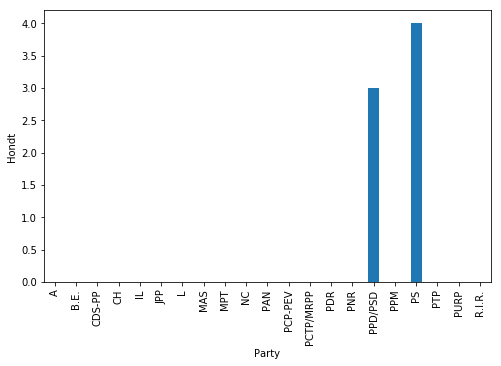

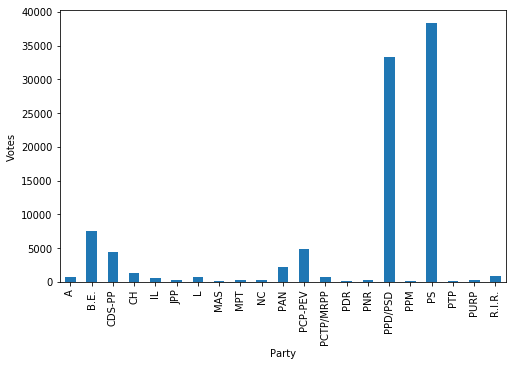

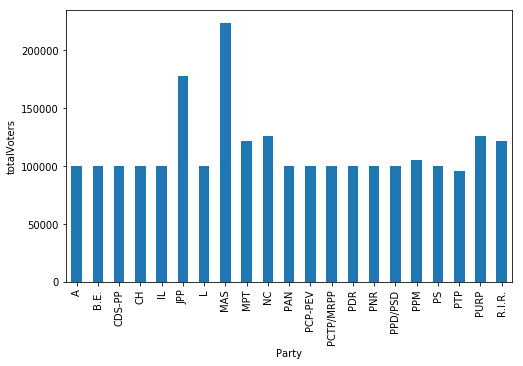

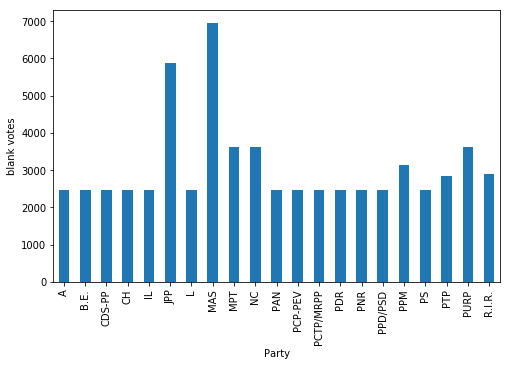

In [12]:

plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['Hondt'].median())

mpg.plot(kind='bar')
plt.ylabel('Hondt')
plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['Votes'].median())

mpg.plot(kind='bar')
plt.ylabel('Votes')
plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['totalVoters'].median())

mpg.plot(kind='bar')
plt.ylabel('totalVoters')


plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['blankVotes'].median())

mpg.plot(kind='bar')
plt.ylabel('blank votes')



Text(0, 0.5, 'Avg Mandates')

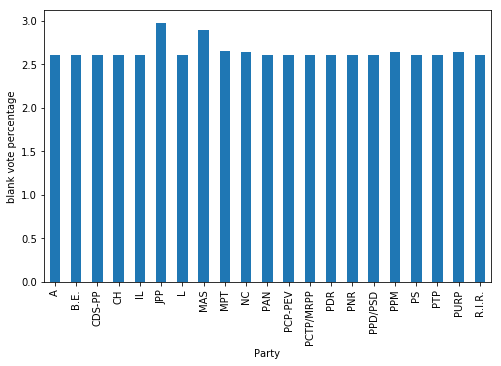

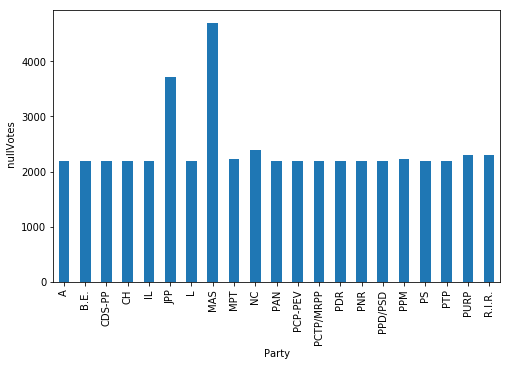

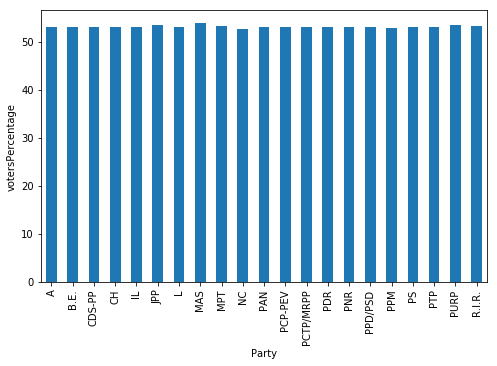

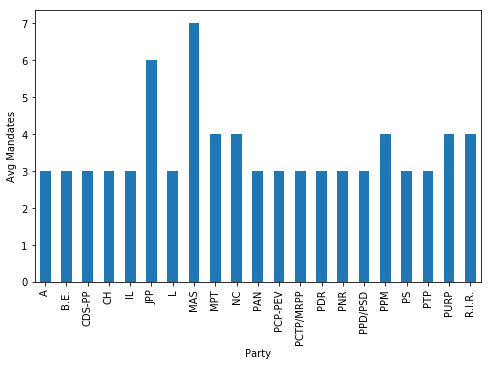

In [13]:
plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['blankVotesPercentage'].median())

mpg.plot(kind='bar')
plt.ylabel('blank vote percentage')
plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['nullVotes'].median())

mpg.plot(kind='bar')
plt.ylabel(' nullVotes')
plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['votersPercentage'].median())

mpg.plot(kind='bar')
plt.ylabel('votersPercentage')

plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['totalMandates'].median())

mpg.plot(kind='bar')
plt.ylabel('Avg Mandates')

Text(0, 0.5, 'Number of parishes approved in this location')

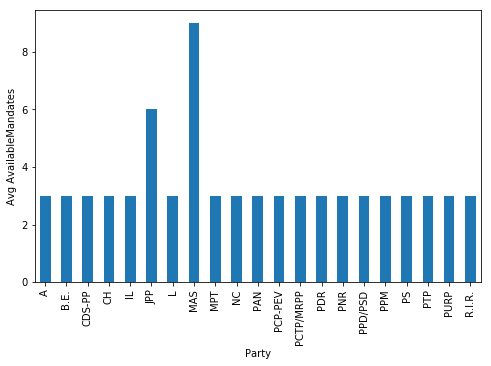

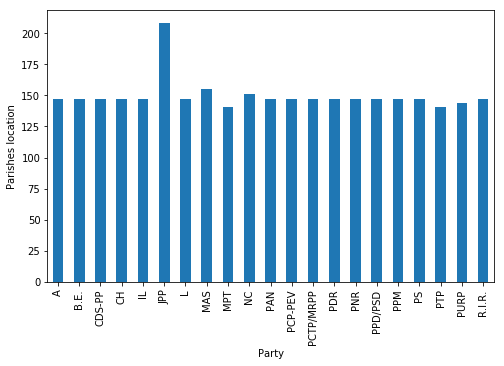

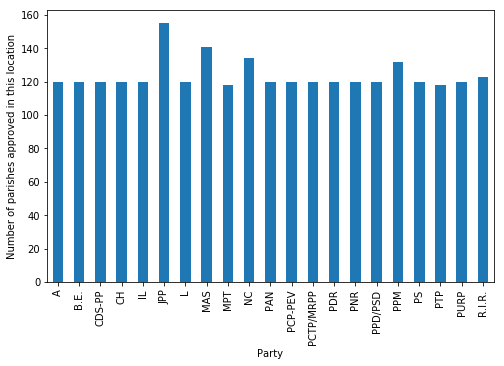

In [14]:
plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['availableMandates'].median())

mpg.plot(kind='bar')
plt.ylabel('Avg AvailableMandates')
plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['numParishes'].median())

mpg.plot(kind='bar')
plt.ylabel('Parishes location')
plt.figure(figsize=(8,5))
mpg=(df.groupby('Party')['numParishesApproved'].median())

mpg.plot(kind='bar')
plt.ylabel('Number of parishes approved in this location')

In [15]:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


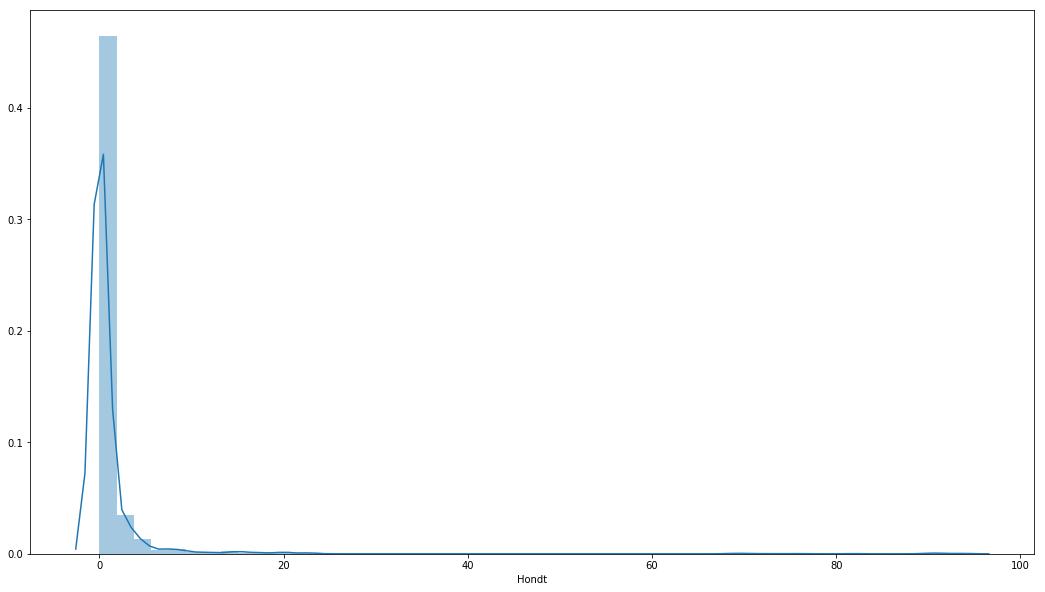

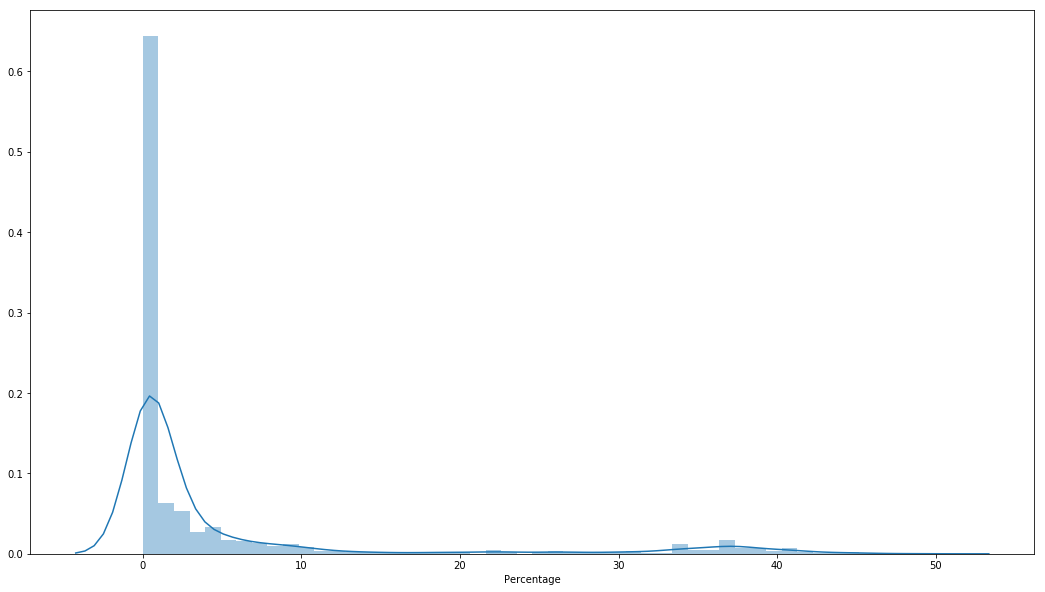

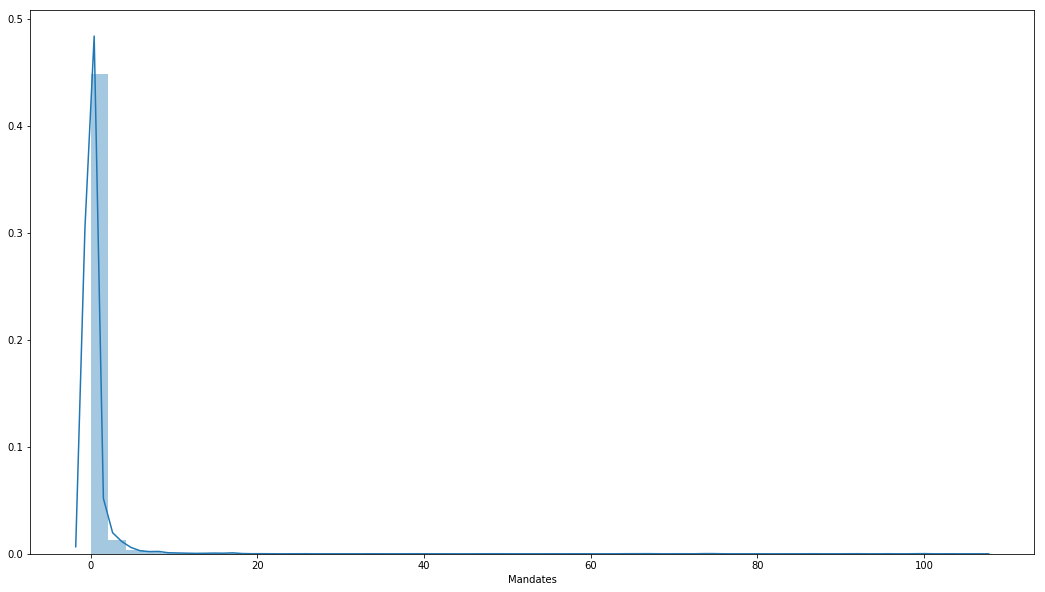

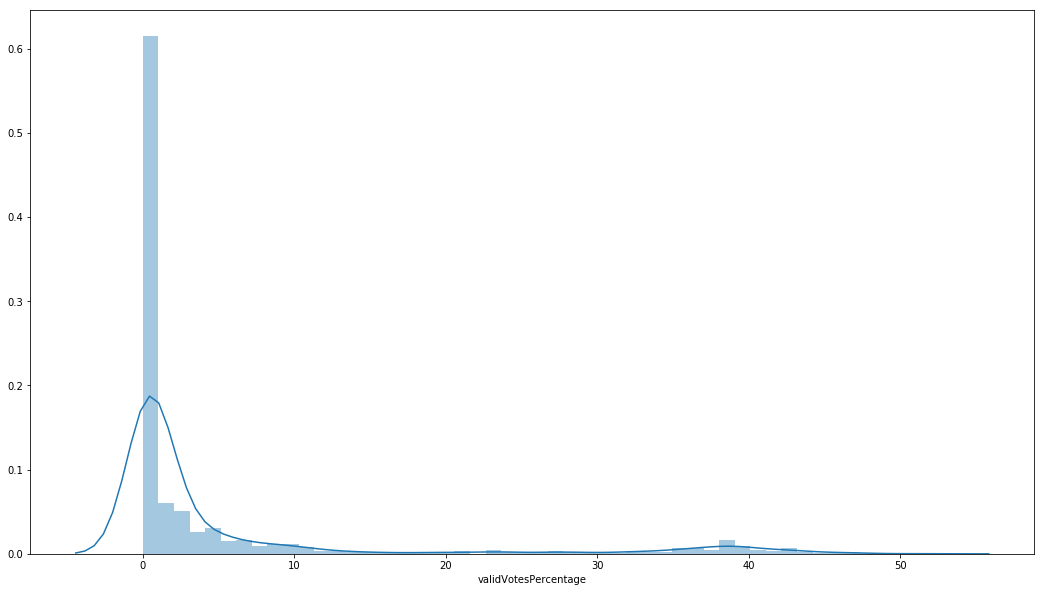

In [16]:
plt.figure(figsize=(18,10))
print(sns.distplot(df.Hondt))
plt.figure(figsize=(18,10))
print(sns.distplot(df.Percentage))
plt.figure(figsize=(18,10))
print(sns.distplot(df.Mandates))
plt.figure(figsize=(18,10))
print(sns.distplot(df.validVotesPercentage))



AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


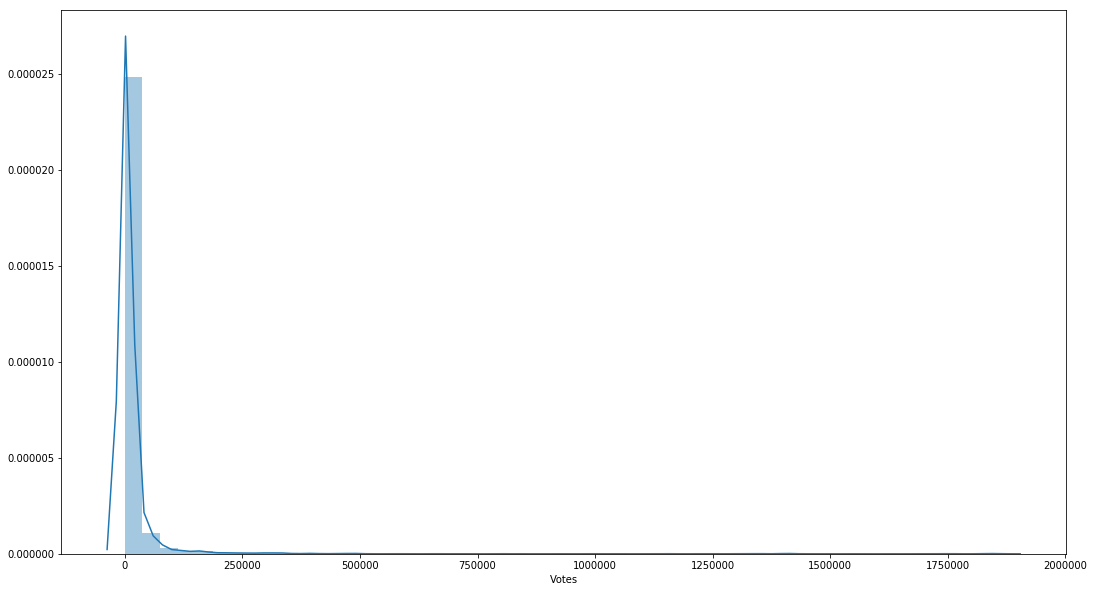

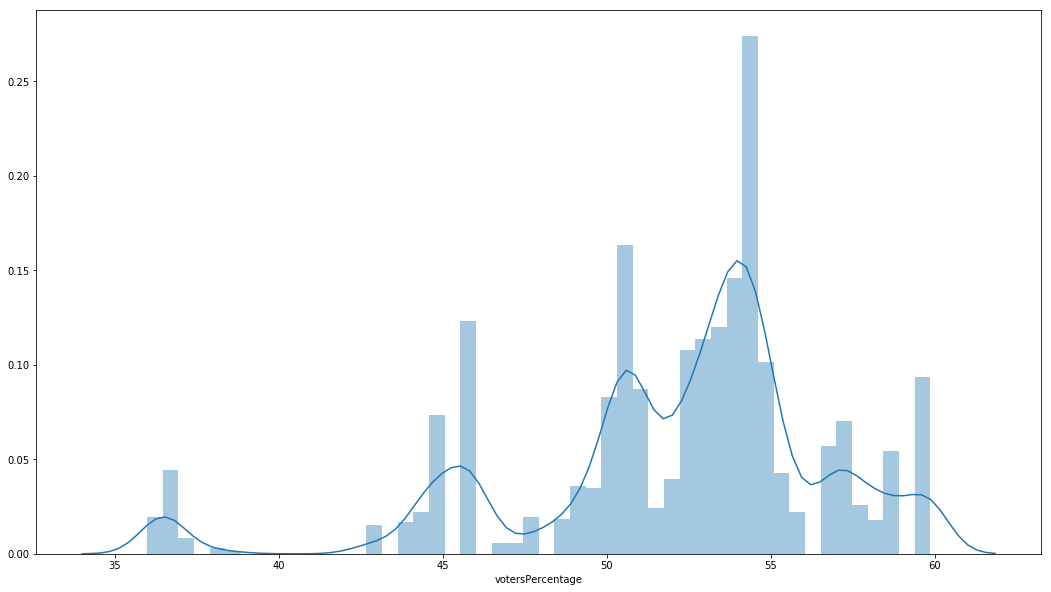

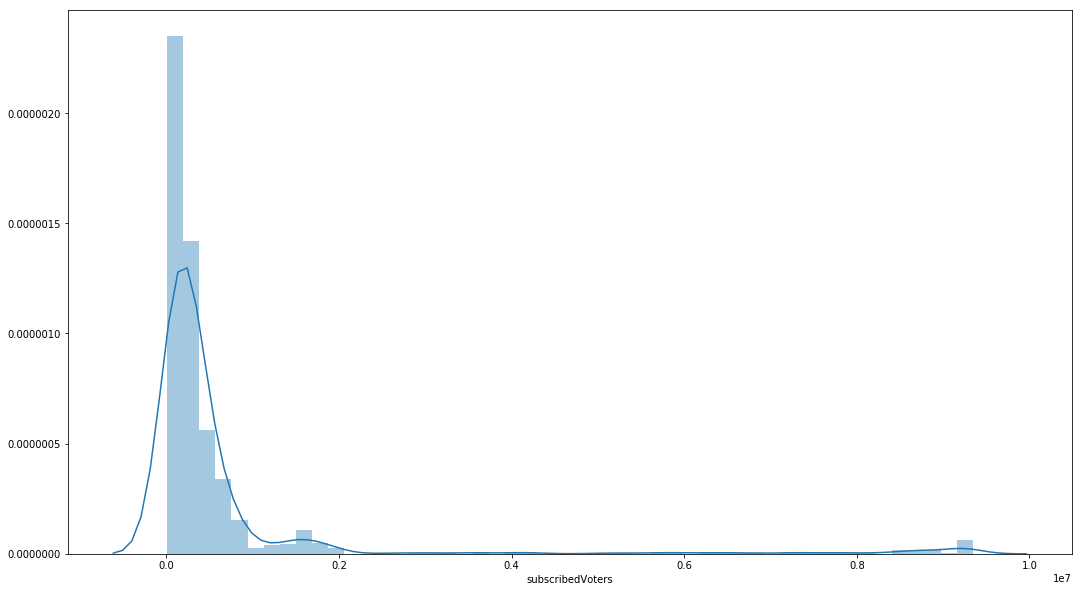

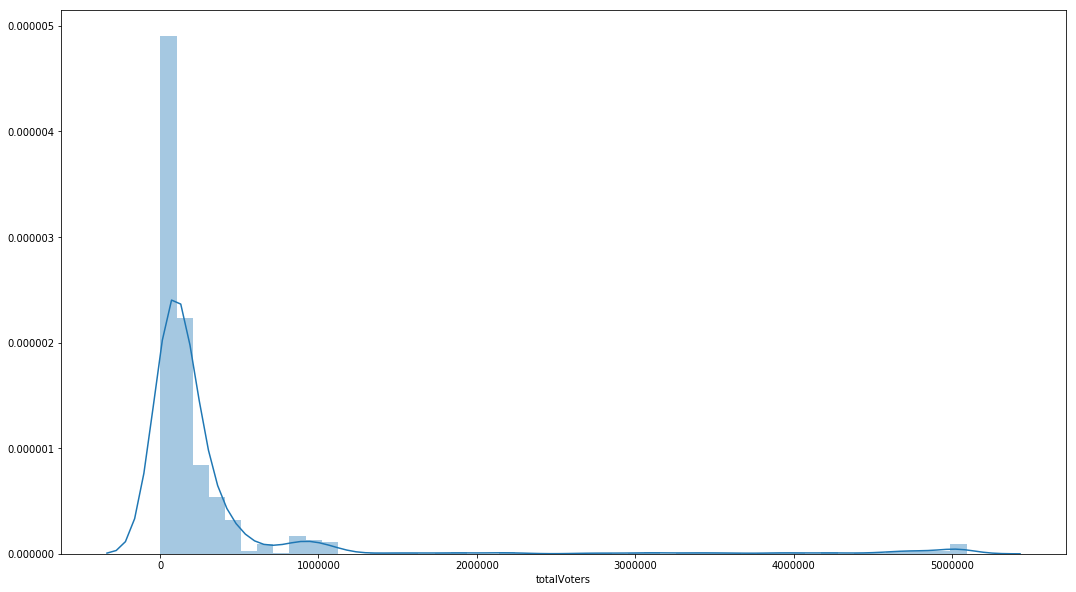

In [17]:
plt.figure(figsize=(18,10))
print(sns.distplot(df.Votes))
plt.figure(figsize=(18,10))
print(sns.distplot(df.votersPercentage))
plt.figure(figsize=(18,10))
print(sns.distplot(df.subscribedVoters))
plt.figure(figsize=(18,10))
print(sns.distplot(df.totalVoters))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 1296x720 with 0 Axes>

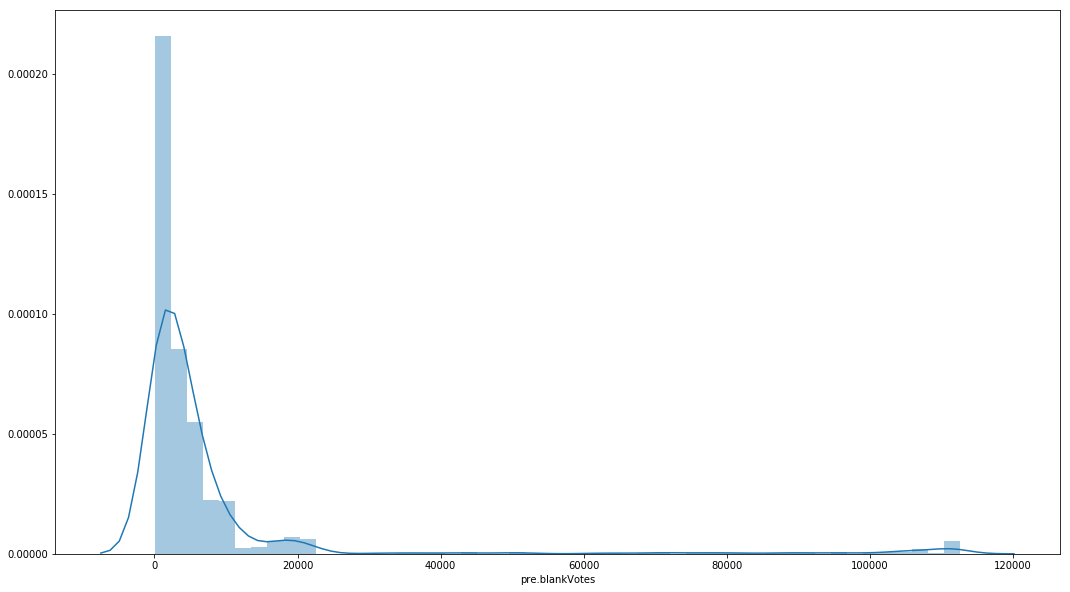

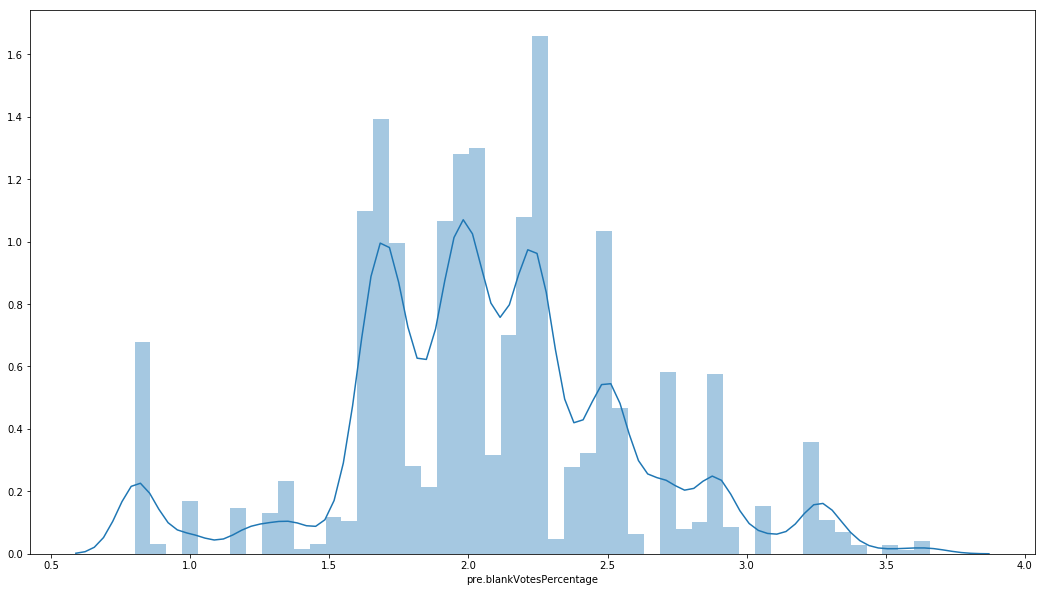

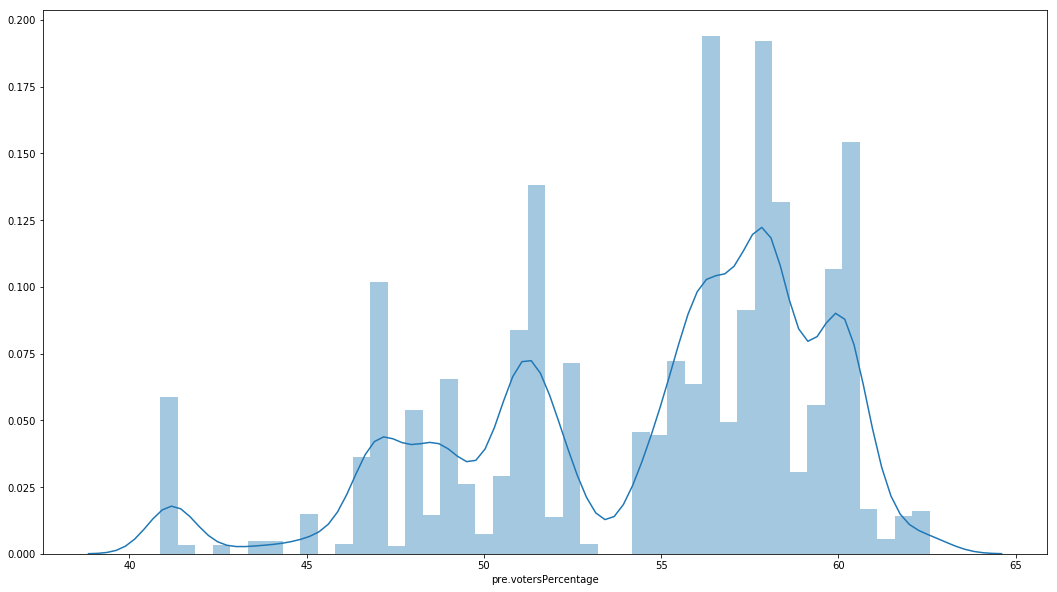

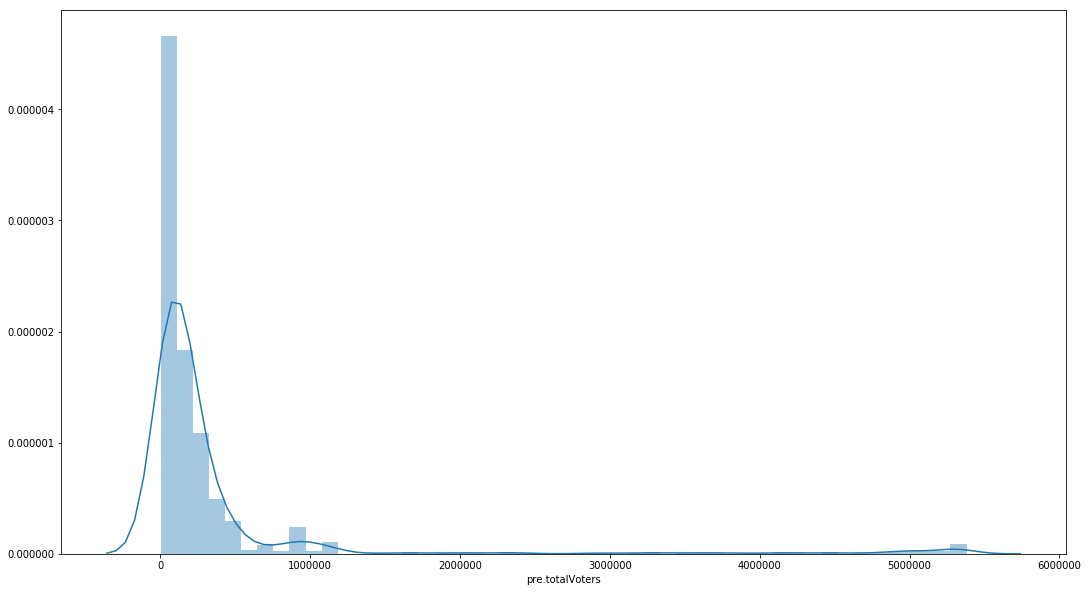

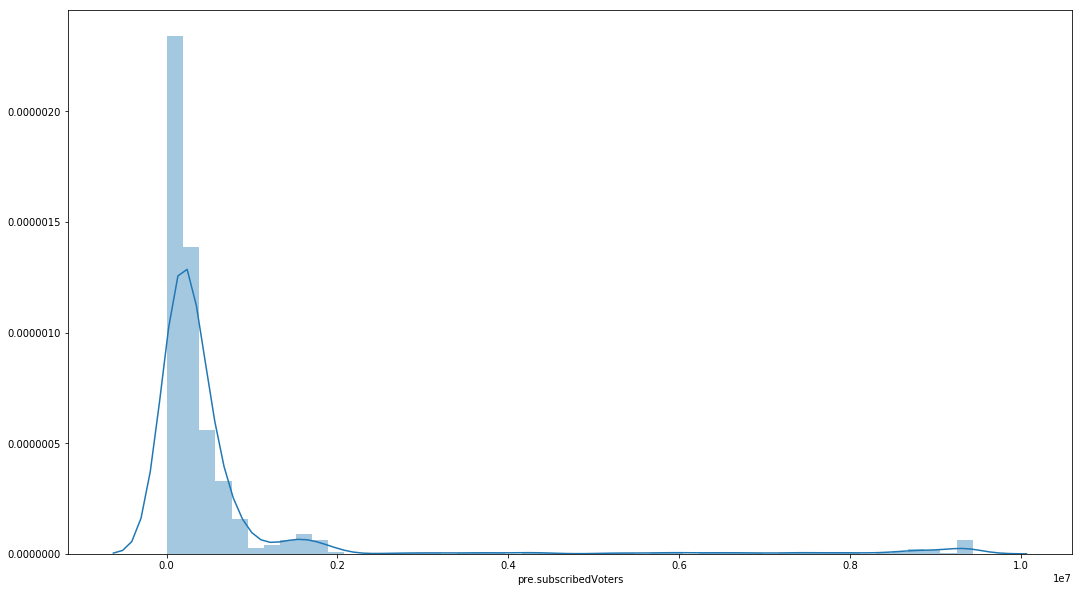

<Figure size 1296x720 with 0 Axes>

In [18]:
plt.figure(figsize=(18,10))
print(sns.distplot(df['pre.blankVotes']))
plt.figure(figsize=(18,10))
print(sns.distplot(df['pre.blankVotesPercentage']))
plt.figure(figsize=(18,10))
print(sns.distplot(df['pre.votersPercentage']))
plt.figure(figsize=(18,10))
print(sns.distplot(df['pre.totalVoters']))
plt.figure(figsize=(18,10))
print(sns.distplot(df['pre.subscribedVoters']))
plt.figure(figsize=(18,10))


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


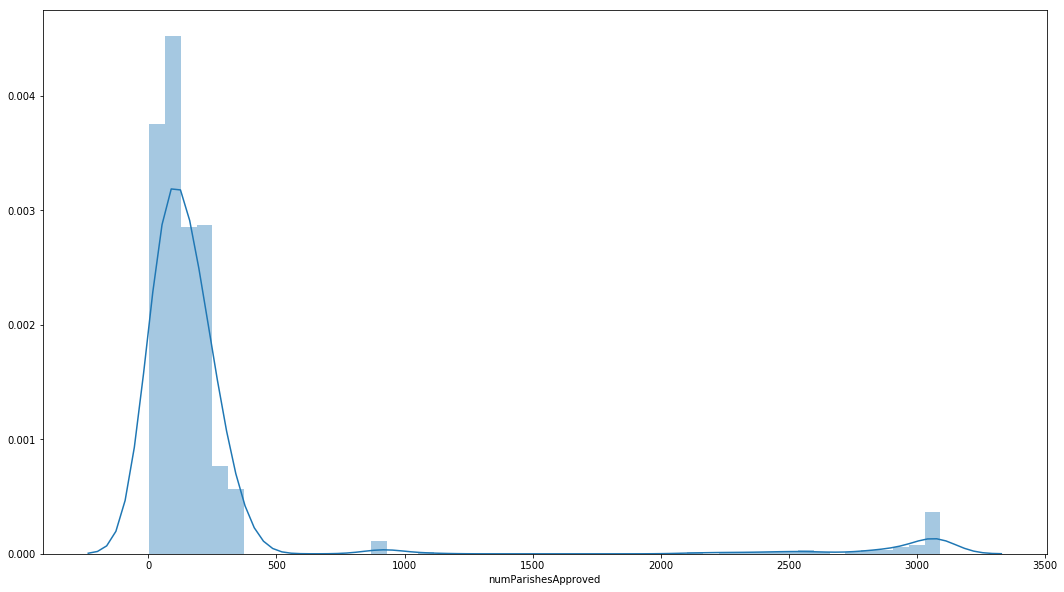

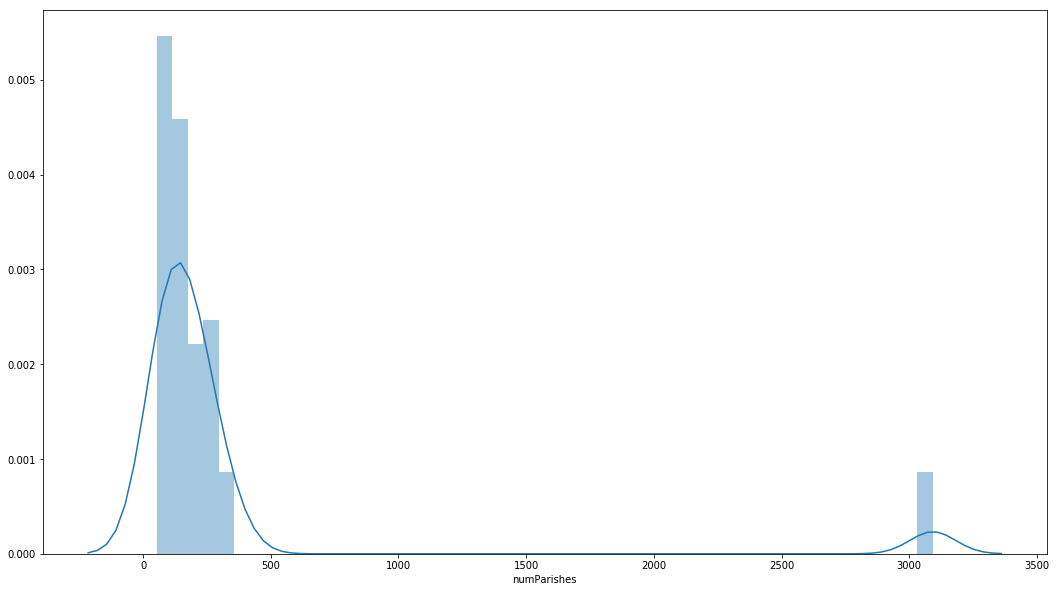

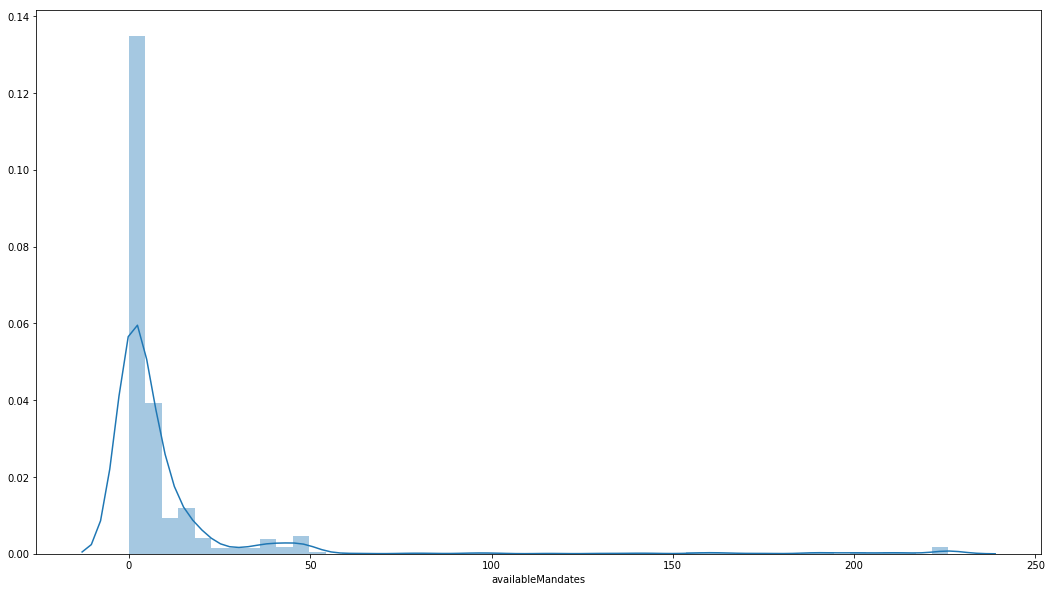

In [19]:
plt.figure(figsize=(18,10))
print(sns.distplot(df.numParishesApproved))
plt.figure(figsize=(18,10))
print(sns.distplot(df.numParishes))
plt.figure(figsize=(18,10))
print(sns.distplot(df.availableMandates))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


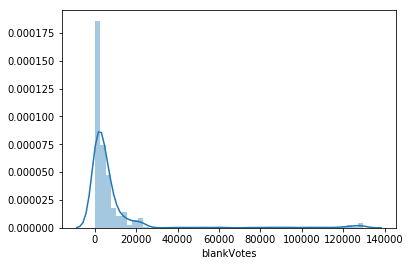

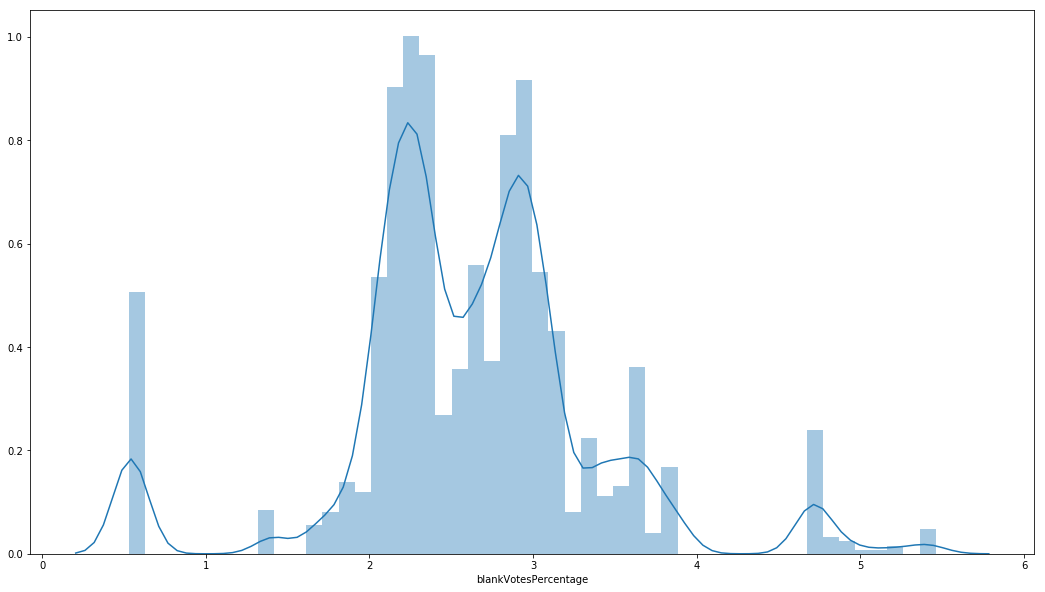

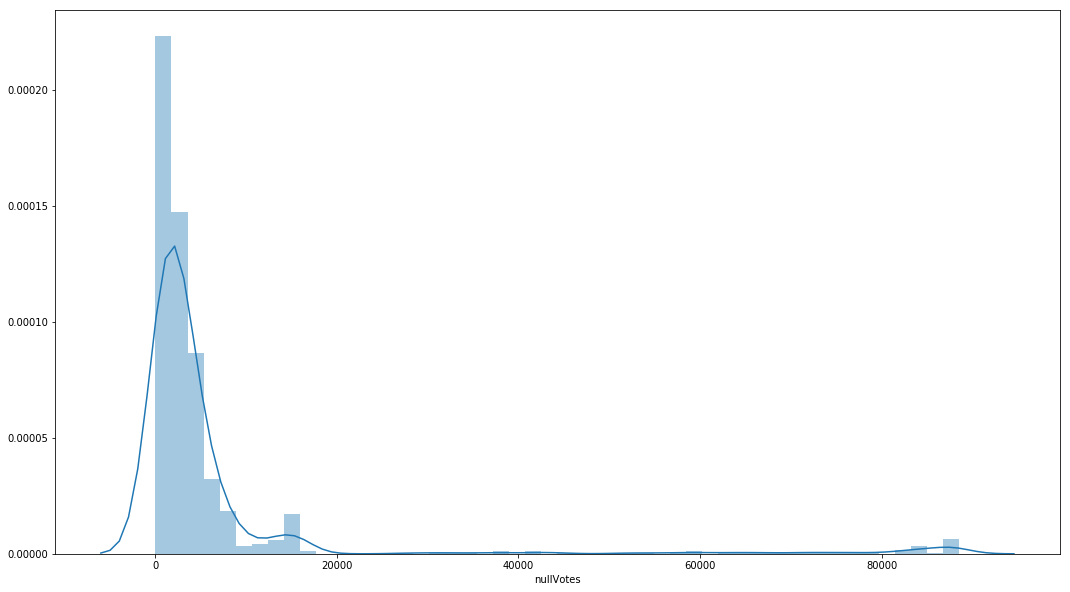

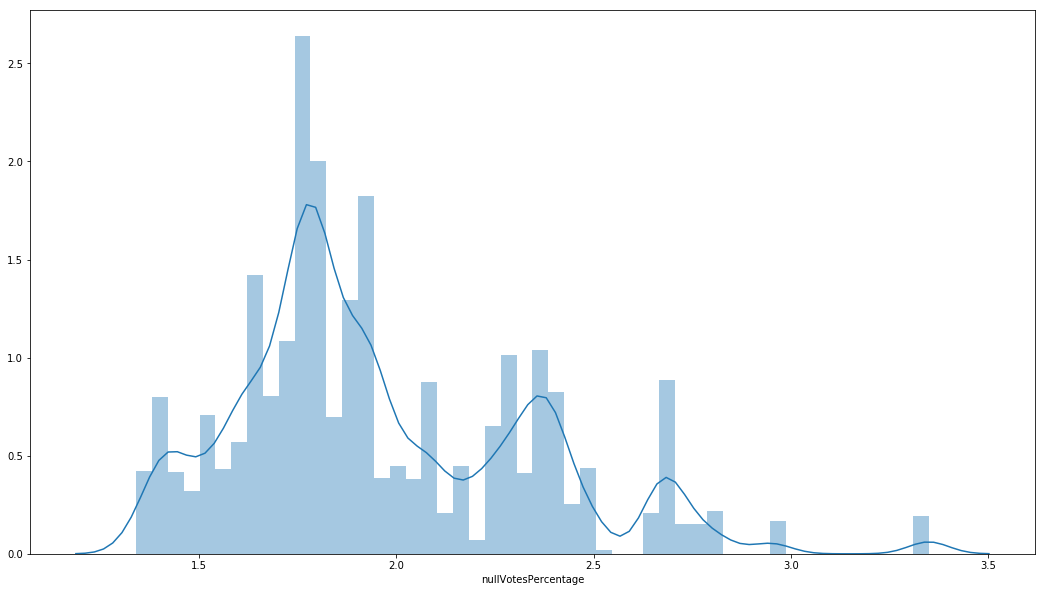

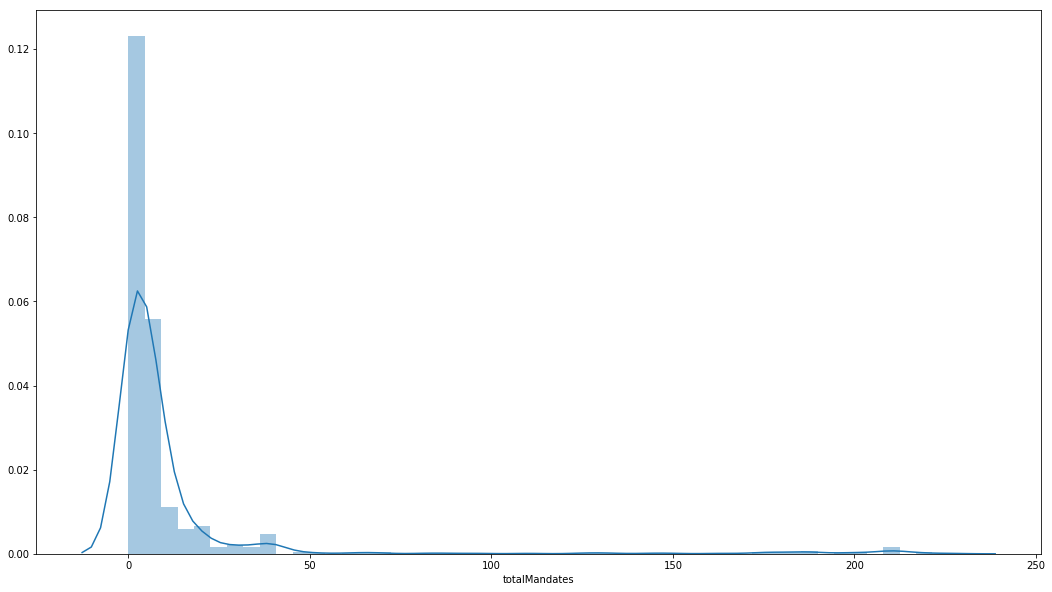

In [20]:
print(sns.distplot(df.blankVotes))
plt.figure(figsize=(18,10))
print(sns.distplot(df.blankVotesPercentage))
plt.figure(figsize=(18,10))
print(sns.distplot(df.nullVotes))
plt.figure(figsize=(18,10))
print(sns.distplot(df.nullVotesPercentage))
plt.figure(figsize=(18,10))
print(sns.distplot(df.totalMandates))

<Figure size 2160x2160 with 0 Axes>

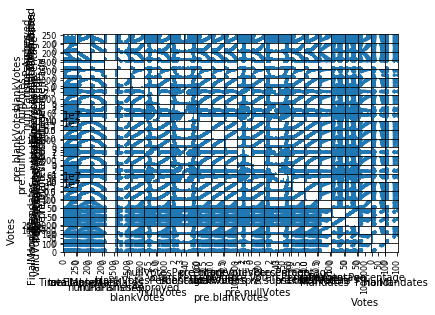

In [7]:
plt.figure(figsize=(30, 30))
scatter_matrix(df)
plt.show()

In [9]:
import plotly.express as px
fig = px.line(df, y='Votes', x='time')
fig.show()

In [10]:
fig = px.line(df, x='TimeElapsed', y='Votes')
fig.show()

In [11]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [12]:
df=df.drop(['time','blankVotesPercentage','TimeElapsed','numParishesApproved','pre.totalVoters','pre.subscribedVoters','availableMandates','pre.blankVotes','nullVotesPercentage','votersPercentage','pre.blankVotesPercentage','pre.nullVotesPercentage','pre.votersPercentage'],axis=1)

In [13]:
df.shape

(21643, 15)

In [14]:
array = df.values
X = array[:,0:14]
Y = array[:,14]

In [15]:
from sklearn.preprocessing import LabelEncoder

df1= list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(df1):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head(3)

territoryName  totalMandates  numParishes  blankVotes  nullVotes  \
0             16              0         3092        9652       8874   
1             16              0         3092        9652       8874   
2             16              0         3092        9652       8874   

   subscribedVoters  totalVoters  pre.nullVotes  Party  Mandates  Percentage  \
0            752529       386497           8171     17         0       38.29   
1            752529       386497           8171     15         0       33.28   
2            752529       386497           8171      1         0        6.81   

   validVotesPercentage   Votes  Hondt  FinalMandates  
0                 40.22  147993     94            106  
1                 34.95  128624     81             77  
2                  7.15   26307     16             19

In [16]:
from sklearn.utils import shuffle
df = shuffle(df)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = df.drop(columns = ['FinalMandates'])
target = df['FinalMandates']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.2,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (17314, 14)
Test data set size :  (4329, 14)


In [17]:

from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)



C:\Users\GT\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

C:\Users\GT\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



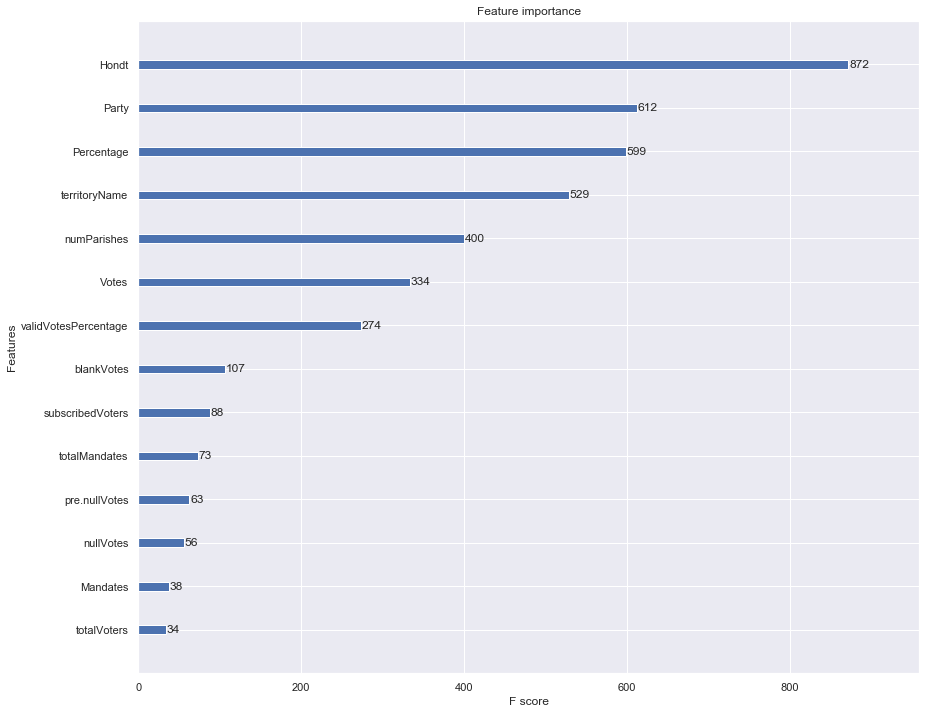

In [18]:
# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance)

In [19]:
pred=model_importance.predict(X_test)
print ("The accuracy of model 3 : ",accuracy_score(y_test, pred))
print ("The f1 score of model 3 : ", f1_score(y_test, pred, average = 'micro'))

The accuracy of model 3 :  0.9997689997689998
The f1 score of model 3 :  0.9997689997689998


In [20]:
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted     0    1    2    3   4   5   6   7   8   9  12  15  17  19  20  \
True                                                                         
0          3549    0    0    0   0   0   0   0   0   0   0   0   0   0   0   
1             0  227    0    0   0   0   0   0   0   0   0   0   0   0   0   
2             0    0  147    0   0   0   0   0   0   0   0   0   0   0   0   
3             0    0    1  123   0   0   0   0   0   0   0   0   0   0   0   
4             0    0    0    0  83   0   0   0   0   0   0   0   0   0   0   
5             0    0    0    0   0  60   0   0   0   0   0   0   0   0   0   
6             0    0    0    0   0   0  11   0   0   0   0   0   0   0   0   
7             0    0    0    0   0   0   0  14   0   0   0   0   0   0   0   
8             0    0    0    0   0   0   0   0  16   0   0   0   0   0   0   
9             0    0    0    0   0   0   0   0   0  11   0   0   0   0   0   
12            0    0    0    0   0   0   0   0   0   0  26   0   0   0   0   
15            0    0    0    0   0   0   0   0   0   0   0  11   0   0   0   
17            0    0    0    0   0   0   0   0   0   0   0   0  11   0   0   
19            0    0    0    0   0   0   0   0   0   0   0   0   0  13   0   
20            0    0    0    0   0   0   0   0   0   0   0   0   0   0   9   
77            0    0    0    0   0   0   0   0   0   0   0   0   0   0   0   
106           0    0    0    0   0   0   0   0   0   0   0   0   0   0   0   
All        3549  227  148  123  83  60  11  14  16  11  26  11  11  13   9   

Predicted  77  106   All  
True                      
0           0    0  3549  
1           0    0   227  
2           0    0   147  
3           0    0   124  
4           0    0    83  
5           0    0    60  
6           0    0    11  
7           0    0    14  
8           0    0    16  
9           0    0    11  
12          0    0    26  
15          0    0    11  
17          0    0    11  
19          0    0    13  
20          0    0     9  
77          8    0     8  
106         0    9     9  
All         8    9  4329

# RAndom forest

In [21]:
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'micro'))

The accuracy of model 2 :  0.9986139986139986
The f1 score of model 2 :  0.9986139986139986
